In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from striprtf.striprtf import rtf_to_text

/Users/dadmehr/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Cell B103 is marked as a date but the serial value 6685366.0 is outside the limits for dates. The cell will be treated as an error.
  for idx, row in parser.parse():


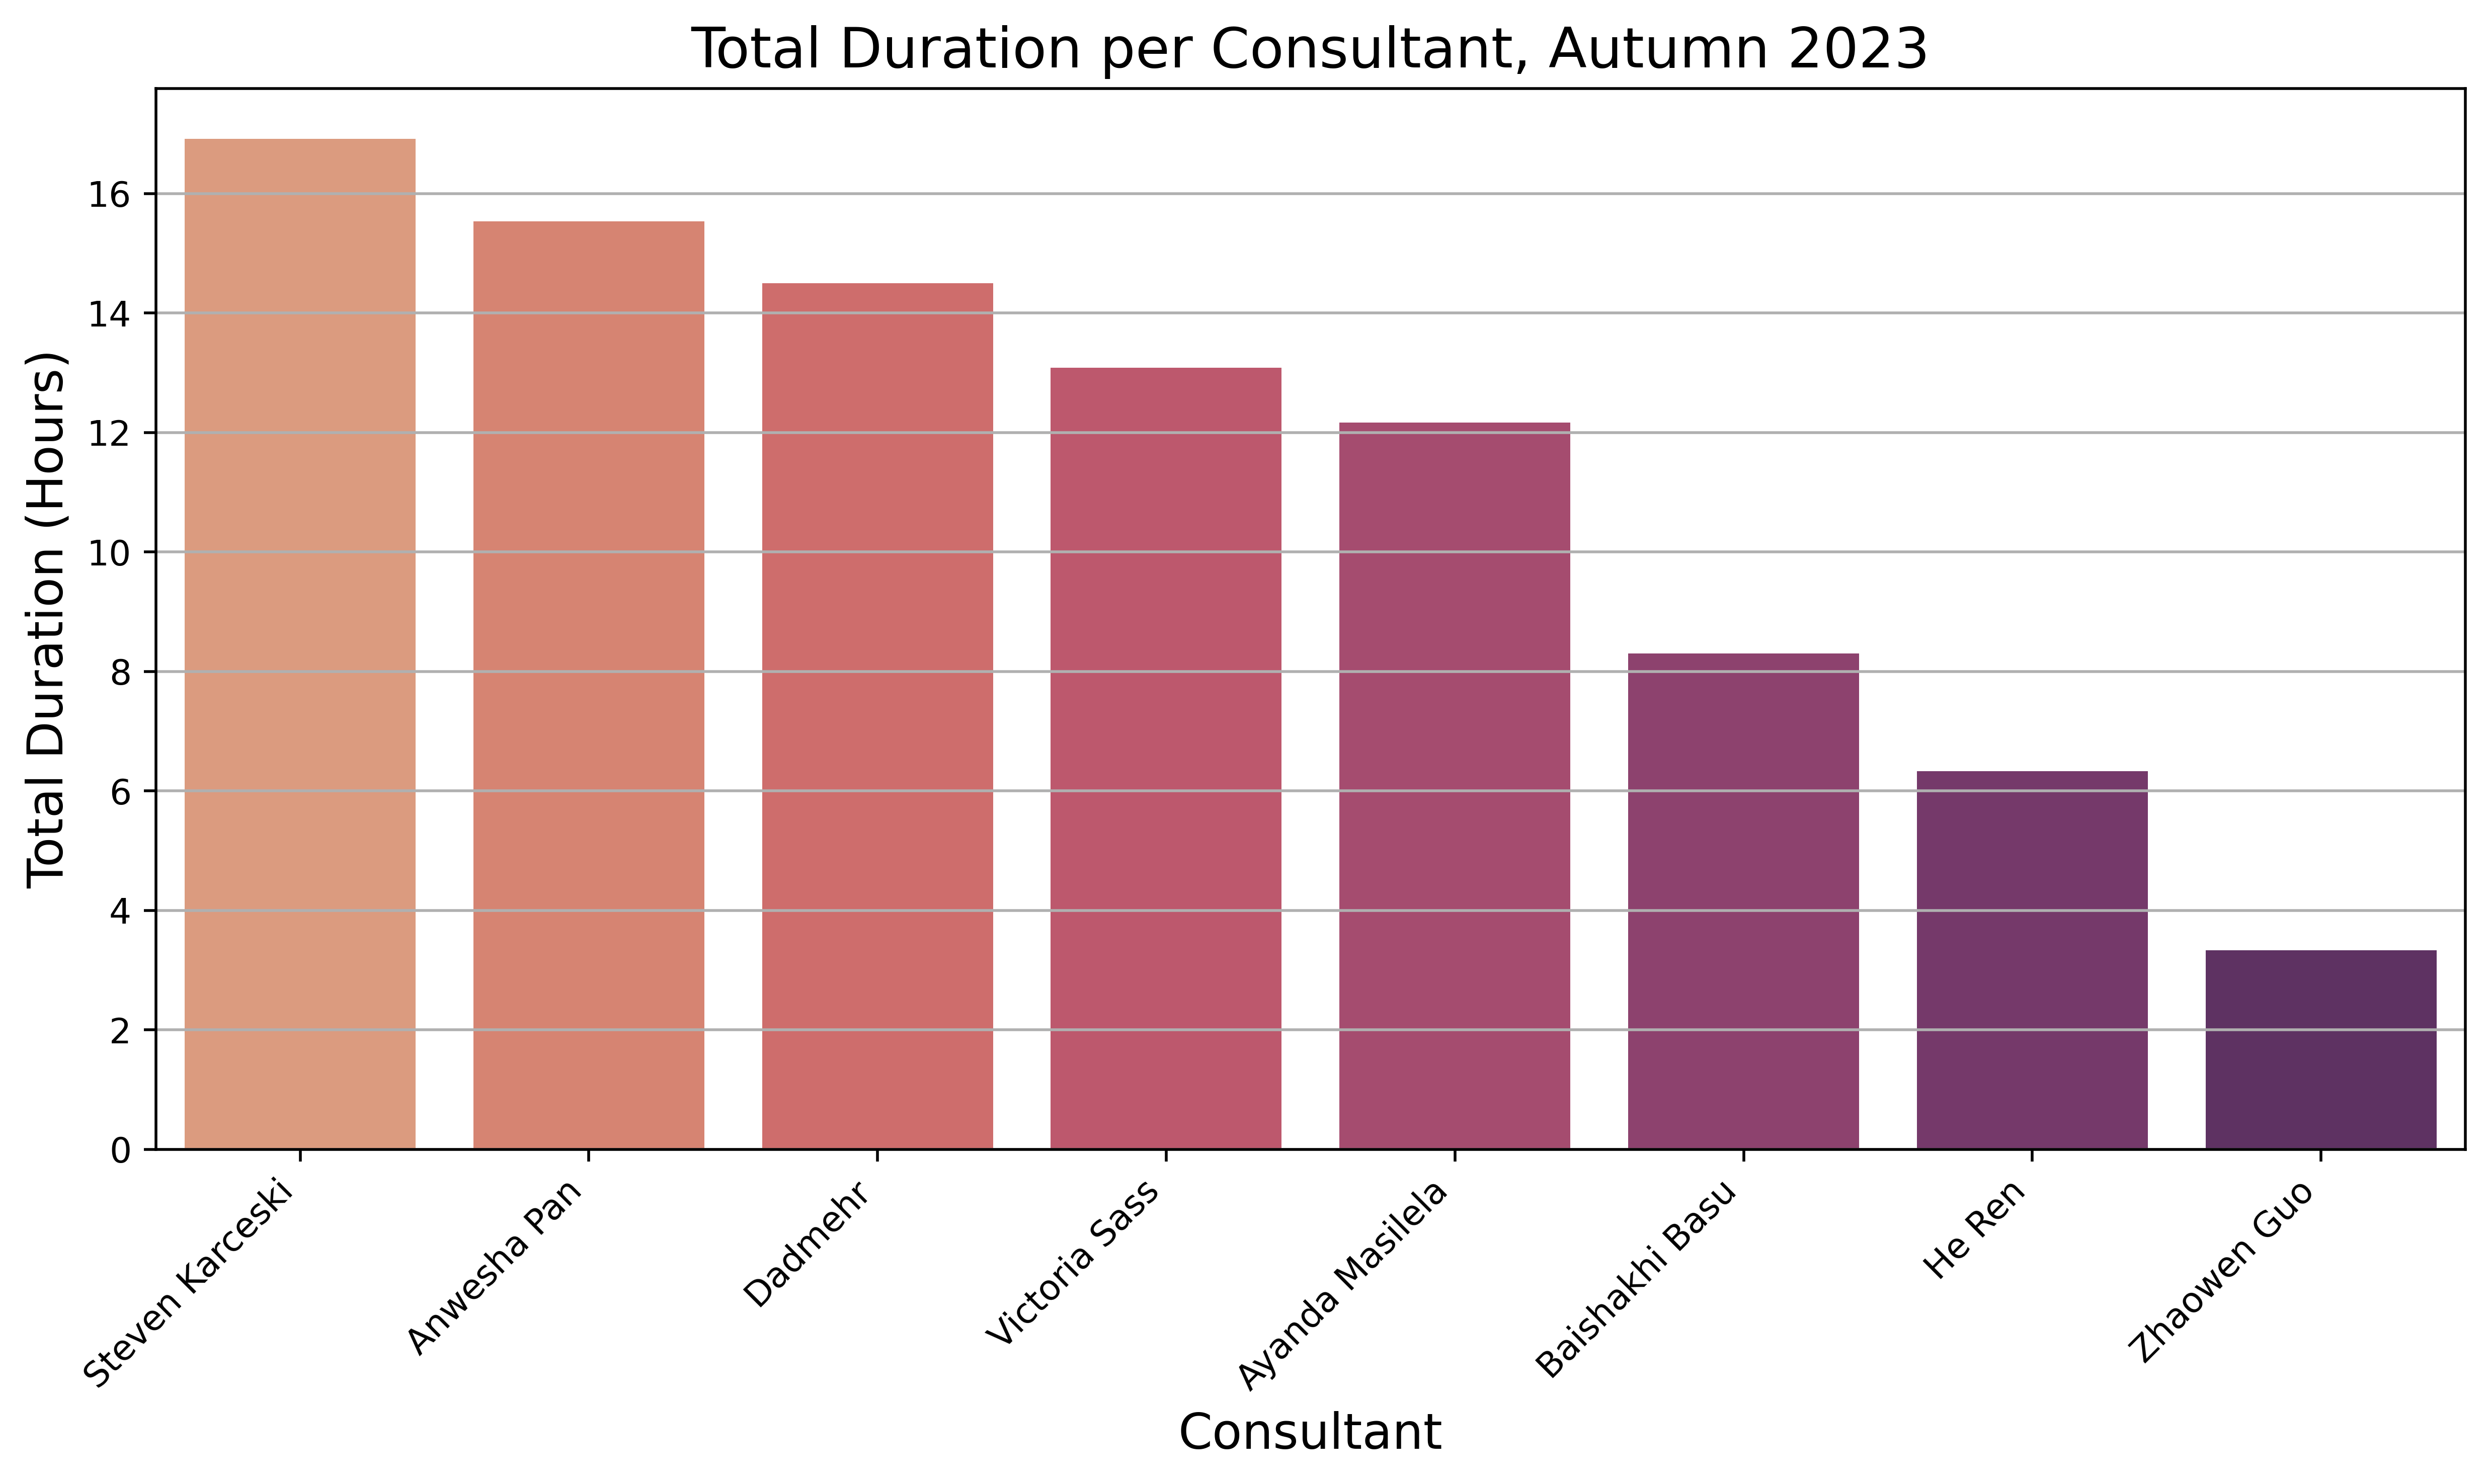

In [2]:
sheet_name = 'Autumn 2023'

file_path = '/Users/dadmehr/Codes/Python/Past/CSSCR_log_url.rtf'

# Read the RTF file
with open(file_path, 'r') as file:
    rtf_content = file.read()

# Convert RTF content to plain text
plain_text = rtf_to_text(rtf_content).strip()

# plain_text now contains the URL
file_url = plain_text
    
df = pd.read_excel(file_url, sheet_name=sheet_name)

# Convert 'Time start ' and 'Time end ' from object (string) to timedelta
df['Time start '] = pd.to_timedelta(df['Time start '].astype(str))
df['Time end '] = pd.to_timedelta(df['Time end '].astype(str))

# Calculate duration in hours
df['Duration'] = (df['Time end '] - df['Time start ']).dt.total_seconds() / 3600

# Standardize consultant names
df['Consultant'] = df['Consultant'].str.strip().str.lower()  # Normalize case and remove trailing spaces
df['Consultant'] = df['Consultant'].replace('anwesa pan', 'anwesha pan')  # Standardize name
df['Consultant'] = df['Consultant'].str.title()


# Group by consultant and sum the durations
total_durations = df.groupby('Consultant')['Duration'].sum()

# Sort by total duration in descending order
total_durations_sorted = total_durations.sort_values(ascending=False).reset_index()

# Plot the data with Seaborn's 'flare' palette
plt.figure(figsize=(10, 6), dpi = 500)
sns.barplot(x='Consultant', y='Duration', data=total_durations_sorted, palette="flare")
plt.title('Total Duration per Consultant, Autumn 2023', fontsize=16)
plt.xlabel('Consultant', fontsize=14)
plt.ylabel('Total Duration (Hours)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [3]:
# Calculate the total sum of all durations and round it to 1 decimal place
total_duration_sum = df['Duration'].sum()
total_duration_sum_rounded = round(total_duration_sum, 1)

total_duration_sum_rounded

90.2

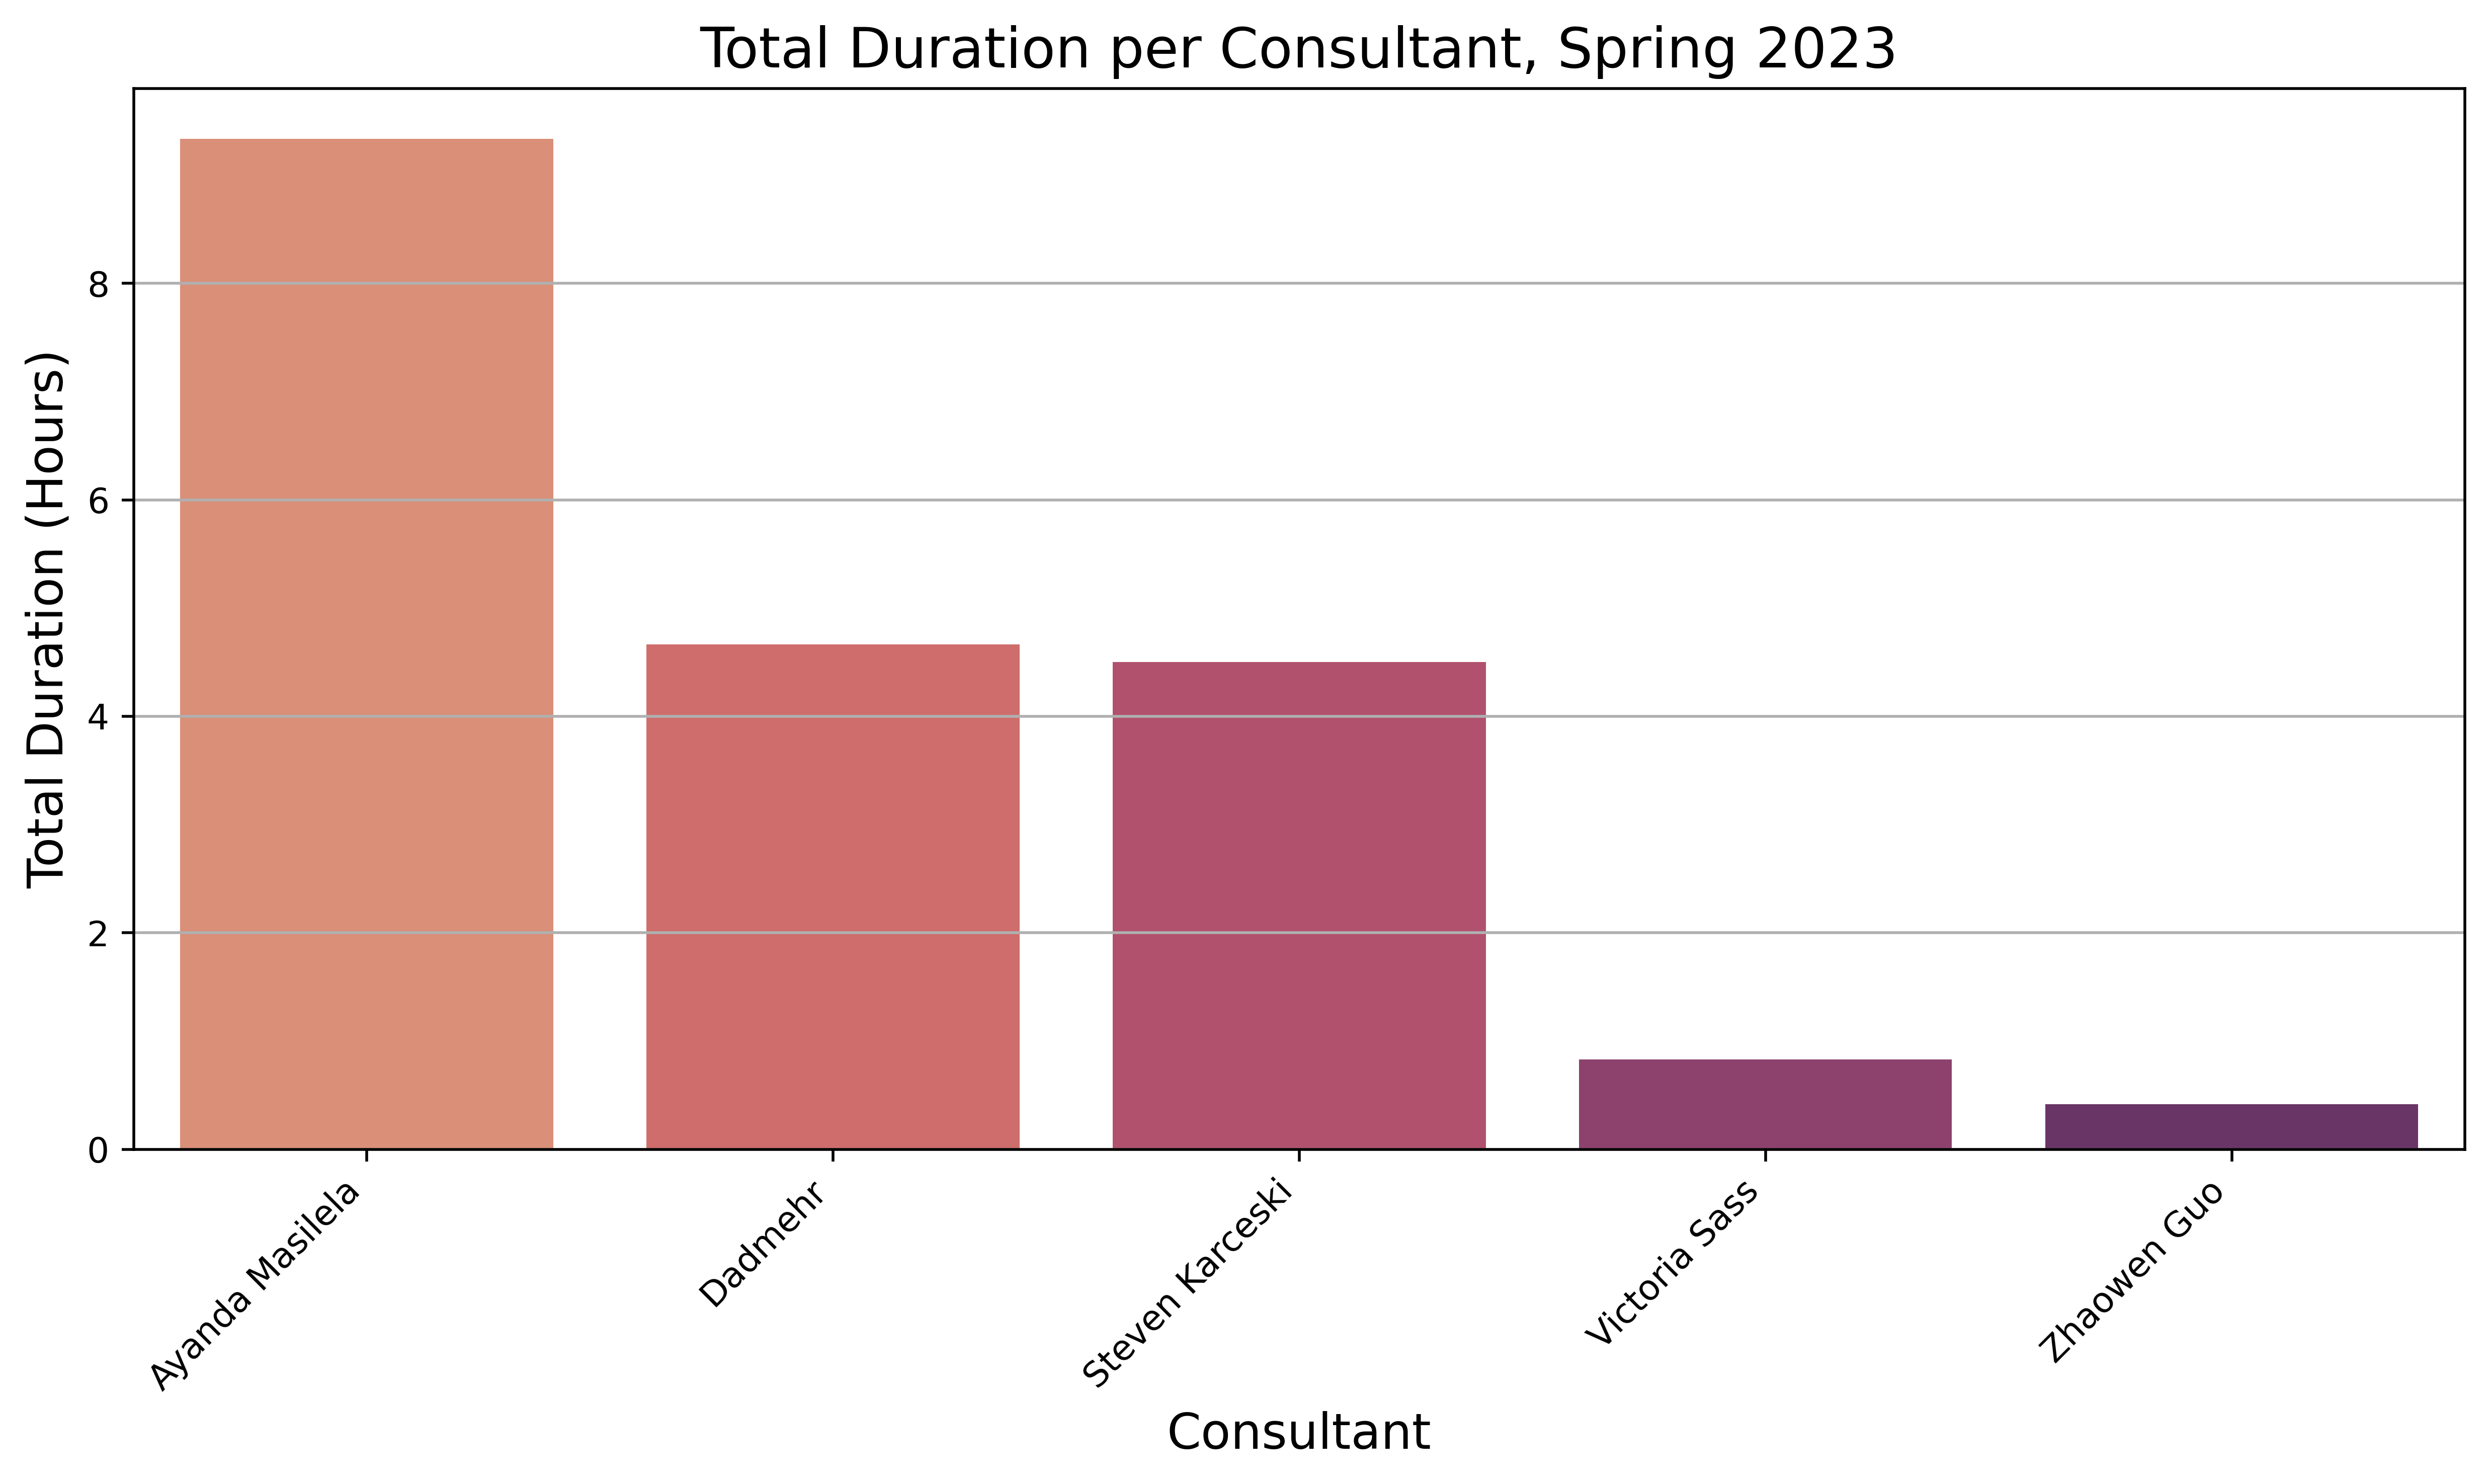

In [6]:
sheet_name = 'Winter 2024'

df = pd.read_excel(file_url, sheet_name=sheet_name)

# Convert 'Time start ' and 'Time end ' from object (string) to timedelta
df['Time start '] = pd.to_timedelta(df['Time start '].astype(str))
df['Time end '] = pd.to_timedelta(df['Time end '].astype(str))

# Calculate duration in hours
df['Duration'] = abs(df['Time end '] - df['Time start ']).dt.total_seconds() / 3600

# Standardize consultant names
df['Consultant'] = df['Consultant'].str.strip().str.lower()  # Normalize case and remove trailing spaces
df['Consultant'] = df['Consultant'].replace('anwesa pan', 'anwesha pan')  # Standardize name
df['Consultant'] = df['Consultant'].str.title()


# Group by consultant and sum the durations
total_durations = df.groupby('Consultant')['Duration'].sum()

# Sort by total duration in descending order
total_durations_sorted = total_durations.sort_values(ascending=False).reset_index()

# Plot the data with Seaborn's 'flare' palette
plt.figure(figsize=(10, 6), dpi = 500)
sns.barplot(x='Consultant', y='Duration', data=total_durations_sorted, palette="flare")
plt.title('Total Duration per Consultant, Spring 2023', fontsize=16)
plt.xlabel('Consultant', fontsize=14)
plt.ylabel('Total Duration (Hours)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')


# Load the Excel file once
xls = pd.ExcelFile(file_url)

# Get sheet names
sheet_names = xls.sheet_names

# Possible column names for start and end times
start_time_columns = ['Time start', 'Time Start']
end_time_columns = ['Time end', 'Time End']

# Dictionary to hold total durations for each sheet
total_durations_per_sheet = {}

for sheet_name in sheet_names:
    # Read each sheet from the loaded Excel file
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Convert all column names to string and then to lower-case
    df.columns = df.columns.astype(str).str.strip().str.lower()

    # Find the actual column names for start and end times
    start_col = next((col for col in df.columns if col in map(str.lower, start_time_columns)), None)
    end_col = next((col for col in df.columns if col in map(str.lower, end_time_columns)), None)

    # Check if the necessary columns exist
    if start_col and end_col:
        try:
            # Convert time columns to timedelta, handling potential data format issues
            df[start_col] = pd.to_timedelta(df[start_col].astype(str), errors='coerce')
            df[end_col] = pd.to_timedelta(df[end_col].astype(str), errors='coerce')

            # Drop rows where either time conversion resulted in NaT (Not a Time)
            df.dropna(subset=[start_col, end_col], inplace=True)

            # Calculate duration in hours
            df['Duration'] = (df[end_col] - df[start_col]).dt.total_seconds() / 3600

            # Sum total durations and store in dictionary
            total_durations_per_sheet[sheet_name] = df['Duration'].sum()
        except Exception as e:
            print(f"An error occurred while processing sheet '{sheet_name}': {e}")
    else:
        print(f"Sheet '{sheet_name}' does not have the required columns.")

# Convert the dictionary to a DataFrame for plotting
total_durations_df = pd.DataFrame(list(total_durations_per_sheet.items()), columns=['Quarter', 'Total Hours'])

# Plot the data
plt.figure(figsize=(10, 6), dpi = 1000)
sns.barplot(x='Quarter', y='Total Hours', data=total_durations_df, palette="flare")
plt.title('Total Duration per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Hours')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


Sheet 'Info' does not have the required columns.
Sheet 'Form Responses 1' does not have the required columns.
Sheet 'Winter 2022' does not have the required columns.
